In [1]:
from tools import *
from figure_2D import *
from figure_3D import *
from RegularGrid import RegularGrid

### **Rows**, **Columns**

In [2]:
degree = 3
rows = 1
cols = 4

In [3]:
grid = RegularGrid(degree, rows, cols)

### **Deployed** and **Undeployed**

In [4]:
deployed_cells   = [0]
undeployed_cells = [1]

- grid.border()
- grid.center()
- grid.vline(line_idx)
- grid.hline(line_idx)
- grid.cross(arm_length)

---

In [5]:
# extremities
active_cells    = deployed_cells + undeployed_cells
target_percents = [100]*len(deployed_cells) + [0]*len(undeployed_cells) # 0:undeployed | 100:deployed

In [6]:
# distributed
# active_cells    = grid.hline()
# target_percents = linear_height_ls(active_cells)

In [7]:
# for c,p in zip(active_cells, target_percents):
#     print(f'cell:target percent - {c:0>2}:{p: >3.0f}%')

In [8]:
# active_cells    = [0, 1, 2, 3, 4, 5, 6, 12, 18, 24, 30]
# target_percents = [0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 20.0, 40.0, 60.0, 80.0, 100.0]

In [9]:
# active_cells    = [0]
# target_percents = [100, 14.285714285714285, 28.57142857142857, 42.857142857142854, 57.14285714285714, 60, 60, 60]

In [10]:
active_cells    = [0,3,5]
target_percents = [100, 70,0]

In [11]:
grid.generate_mesh(scaling=True)

PLATE CHARACTERISTIQUES:
	plate thickness   : 0.020379
	plate edge length : 0.203789


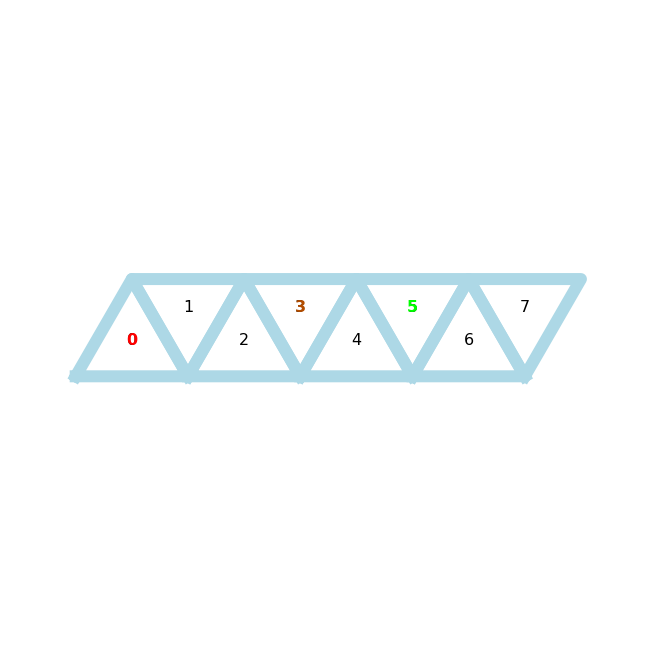

In [12]:
plot_undeployed_2D(grid.input_data, grid.curr_um, show_height=False, active_cells=active_cells, target_percents=target_percents)

In [13]:
view3D = plot3D(grid.curr_um, grid.input_data)
view3D.show()

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(PointLight(color='#999999', position=(0…

In [14]:
grid.deploy(active_cells, target_percents, view3D)

success: True 

energies:
   -2.999926: Full
    0.000073: Elastic
   -2.999999: Deployment
    0.000000: Repulsion
    0.000000: Attraction
    0.000000: AngleBoundPenalty



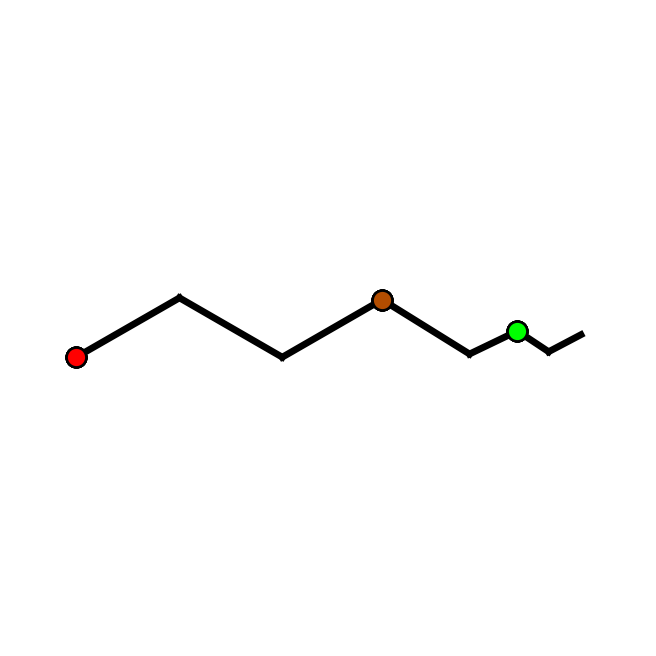

In [15]:
if grid.rows==1 or grid.cols==1:
    projection2D(grid.input_data['umbrella_connectivity'], grid.curr_um, active_cells=active_cells, target_percents=target_percents, show_plot=True)

In [16]:
sview_vm = plot3D_stress(grid.curr_um, 'VonMises')
sview_vm.show()

VonMises Stresses Extrem values:
    max : 4.53e+01
    min : 0.00e+00


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(PointLight(color='#999999', position=(0…

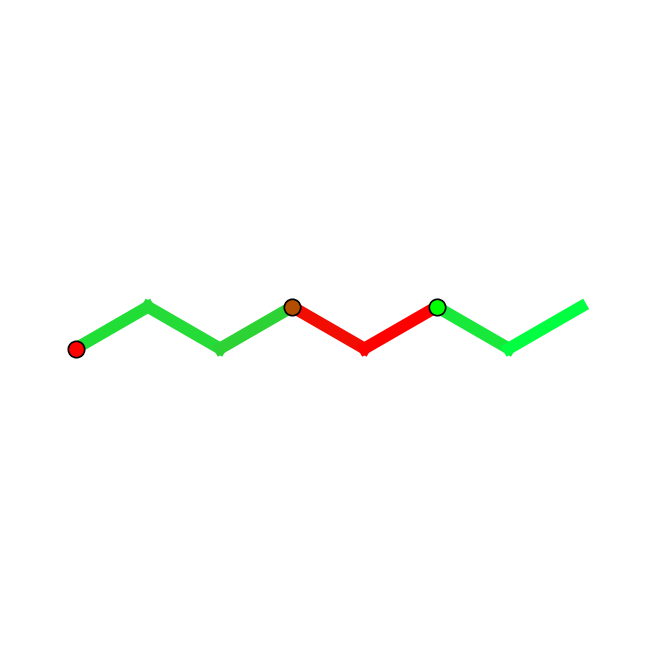

In [17]:
plot2D_stress(grid.curr_um, grid.input_data['umbrella_connectivity'], grid.init_center_pos, active_cells, target_percents, show_percent=False)